In [1]:
from datetime import date
import pandas as pd
import numpy as np
import os
import glob
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore') # Para evitar los molestos avisos.
%matplotlib inline

In [2]:
#Si Trasbajo con matriz rala (ojo con el overfitting) 
#Dominios: tipo de paginas (ex: pagina de empleos, pagina de entretenimiento, página de propiedades, página deportes)
#Dominios y ULRS: cuántas paginas visitó cada persona de ESE Dominio. Saber si la persona vio 1 empelo o 500 empleos por ej. 
#URLS: cuantas pageview tiene un usuario por dominio, apra ver la INTENCIONALIDAD de los usuarios
#Urls.. incluirlas?

Lectura del dataset.    
Filtrado por tipo de feature, tomando: 

**df** (Modelo Dispositivo)   
**ov** (versión del sistema operativo)   
**bf** (browser)   
**db** (Marca Dispositivo)   
**of** (sistema operativo)   
**pc** (es pc)      
**im** (es celular)     
**ti** (es tablet)   
**oa** (antigüedad del Dispositivo)

In [3]:
colnames = ['device_idx','label','feature_type','feature_detail','age']
df_analisis_exp = pd.read_csv('df_demografico_ar.csv', usecols=colnames)
df_analisis_exp = df_analisis_exp[(df_analisis_exp['feature_type']=='df')|(df_analisis_exp['feature_type']=='ov')|\
                                 (df_analisis_exp['feature_type']=='bf')|(df_analisis_exp['feature_type']=='db')|\
                                 (df_analisis_exp['feature_type']=='of')|(df_analisis_exp['feature_type']=='ip')|\
                                 (df_analisis_exp['feature_type']=='im')|(df_analisis_exp['feature_type']=='it')|\
                                 (df_analisis_exp['feature_type']=='oa')]

print('Distintos tipos de feature que corresponden a User Agent',df_analisis_exp['feature_type'].unique())
print('Genero una variable target 0 - 1, donde 1 es femenino y 0 es masculino')
df_analisis_exp['fem'] = np.where(df_analisis_exp['label']==3,1,0)
print(100*pd.value_counts(df_analisis_exp.fem)/df_analisis_exp.shape[0])
df_analisis_exp.head(3)

Distintos tipos de feature que corresponden a User Agent ['db' 'bf' 'ov' 'im' 'of' 'df' 'oa' 'ip' 'it']
Genero una variable target 0 - 1, donde 1 es femenino y 0 es masculino
1    53.056474
0    46.943526
Name: fem, dtype: float64


,device_idx,label,feature_type,feature_detail,age,fem
0,392.0,2.0,db,XiaoMi,6.0,0
2,392.0,2.0,bf,Chrome,6.0,0
3,392.0,2.0,ov,Android 9,6.0,0


### MARCAS

##### Observo cantidad de dispositivos por marca. Genero una variable donde incluyo en el valor 'Otros' a aquellas marcas con menos de 2000 dispositivos.

In [4]:
print('Value counts de feature db (marca)')
data = df_analisis_exp[df_analisis_exp['feature_type']=='db']
pd.DataFrame(data['feature_detail'].value_counts())

Value counts de feature db (marca)


,feature_detail
Samsung,21350
Apple,3471
XiaoMi,1975
Huawei,1238
LG,1006
Motorola,567


In [5]:
print('Porcentaje sobre total de dispositivos únicos del dataset')
data = df_analisis_exp[df_analisis_exp['feature_type']=='db']
pd.DataFrame(round(data['feature_detail'].value_counts()/df_analisis_exp['device_idx'].nunique()*100,2))

Porcentaje sobre total de dispositivos únicos del dataset


,feature_detail
Samsung,24.04
Apple,3.91
XiaoMi,2.22
Huawei,1.39
LG,1.13
Motorola,0.64


In [6]:
print('Porcentaje de dispositivos en cada marca sobre total de dispositivos con marca')
data = df_analisis_exp[df_analisis_exp['feature_type']=='db']
pd.DataFrame(round(data['feature_detail'].value_counts()/data.shape[0]*100,2))

Porcentaje de dispositivos en cada marca sobre total de dispositivos con marca


,feature_detail
Samsung,72.11
Apple,11.72
XiaoMi,6.67
Huawei,4.18
LG,3.40
Motorola,1.92


In [7]:
data2=pd.DataFrame(data['feature_detail'].value_counts())
data2=data2['feature_detail'].cumsum()/data.shape[0] #Cummulative Sum
data2

Samsung     0.721113
Apple       0.838349
XiaoMi      0.905056
Huawei      0.946871
LG          0.980849
Motorola    1.000000
Name: feature_detail, dtype: float64

In [8]:
print("Cummulative distribution of the top 1 of the models with more devices (%): ",round(data2.iloc[0]*100,3))
print("Cummulative distribution of the top 2 of the models with more devices (%): ",round(data2.iloc[1]*100,3))
print("Cummulative distribution of the top 3 of the models with more devices (%): ",round(data2.iloc[2]*100,3))
print("Cummulative distribution of the top 5 of the models with more devices (%): ",round(data2.iloc[4]*100,3))

Cummulative distribution of the top 1 of the models with more devices (%):  72.111
Cummulative distribution of the top 2 of the models with more devices (%):  83.835
Cummulative distribution of the top 3 of the models with more devices (%):  90.506
Cummulative distribution of the top 5 of the models with more devices (%):  98.085


After the first 2 most popular devices brand, it is shown that adding a new brand is not very significative.

Barplot de variable feature (marcas)


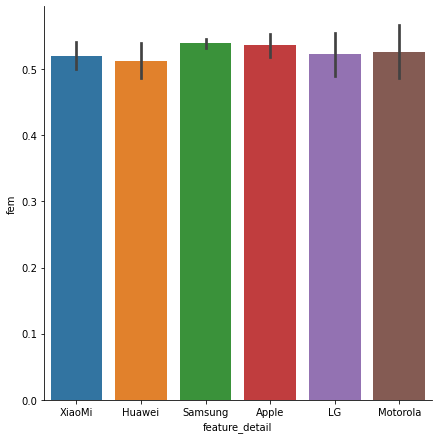

In [9]:
print('Barplot de variable feature (marcas)')
data = df_analisis_exp[df_analisis_exp['feature_type']=='db']
sns.catplot(x='feature_detail',y='fem',data=data,kind='bar',height=6)
plt.show()

En este gráfico puede verse que probablemente este feature no sea significativo en la performance del futuro modelo. Poca variablidad.   
Además, en el análisis exploratorio se vio que no existen diferencias llamativas por género.   
**No se incluirá MARCA como variable independiente en el primero modelo User Agent**

In [188]:
# lista_marcas_relevantes = []
# marca_disp = pd.DataFrame(data['feature_detail'].value_counts()).reset_index().rename(columns={'index':'brand'})
# for feature_detail, row in marca_disp.iterrows():
#     if int(row.feature_detail) > 1999:
#         lista_marcas_relevantes.append(str(row.brand))
# lista_marcas_relevantes   

['Samsung', 'Apple']

In [189]:
# marca_disp_final = df_analisis_exp[df_analisis_exp['feature_type']=='db']
# marca_disp_final['feature_detail'] = np.where(marca_disp_final['feature_detail'].isin(lista_marcas_relevantes), \
#                                                marca_disp_final['feature_detail'], 'marca_Otros')
# marca_disp_final = marca_disp_final[['device_idx','feature_detail']]
# marca_disp_final = marca_disp_final.rename(columns={"feature_detail": "feature_detail_2"})
# marca_disp_final.head(3)

,device_idx,feature_detail_2
0,392.0,marca_Otros
209,6170.0,marca_Otros
261,6327.0,Samsung


Incorporo al dataset original la nueva variable.

In [190]:
# df_analisis_exp = pd.merge(df_analisis_exp, marca_disp_final, how='left', on='device_idx')
# df_analisis_exp['feature_detail2'] = np.where(df_analisis_exp['feature_type']=='db', \
#                                               df_analisis_exp['feature_detail_2'], \
#                                               df_analisis_exp['feature_detail'])
# df_analisis_exp = df_analisis_exp.drop('feature_detail_2', axis=1)
# print(df_analisis_exp[df_analisis_exp['feature_type']=='db'].feature_detail2.unique())
# #ATENCION, DEBERIA ELIMINAR EL VIEJO feature_detail
# df_analisis_exp[df_analisis_exp['feature_type']=='db'].head()

['marca_Otros' 'Samsung' 'Apple']


,device_idx,label,feature_type,feature_detail,y,feature_detail2
0,392.0,2.0,db,XiaoMi,0,marca_Otros
40,6170.0,3.0,db,Huawei,1,marca_Otros
47,6327.0,3.0,db,Samsung,1,Samsung
52,7029.0,3.0,db,Samsung,1,Samsung
59,7409.0,2.0,db,Samsung,0,Samsung


**Warning**: Las marcas son pocas, quizás me convenga dejarlas a todas (Revisar)

### MODELOS

##### Observo si los modelos de los dispositivos cuentan con características de color. Este puede ser un buen insight para definir género.

In [10]:
print('Valores únicos de modelos de dispositivos')
df_analisis_exp[df_analisis_exp['feature_type']=='df'].feature_detail.unique()

Valores únicos de modelos de dispositivos


array(['XiaoMi Redmi Note 8', 'moto e5 play', 'Samsung SM-J710MN',
       'Samsung SM-G532M', 'iPhone', 'Samsung SM-A105M',
       'Samsung SM-J701M', 'Samsung SM-A505G', 'Samsung SM-G9600',
       'Samsung SM-A520F', 'Samsung SM-A307G', 'Samsung SM-G9650',
       'Samsung SM-A515F', 'Samsung SM-A705MN', 'Samsung SM-G610M',
       'Moto G (5S', 'Samsung SM-J400M', 'Samsung SM-A205G',
       'Samsung SM-G570M', 'Samsung SM-G975F', 'LG-M250',
       'Samsung SM-J600G', 'Samsung SM-A217M', 'Samsung SM-A715F',
       'Samsung SM-A305G', 'Samsung SM-A015M', 'XiaoMi Redmi Note 7',
       'Moto G (5', 'Samsung SM-A107M', 'Samsung SM-J700M',
       'Samsung SM-J415G', 'moto e5', 'Samsung SM-J260M', 'Moto C',
       'Samsung SM-A315G', 'Samsung SM-G955F', 'Samsung SM-J610G', 'Mac',
       'Samsung SM-A207M', 'Samsung SM-G950F', 'Samsung SM-A115M',
       'Moto E (4', 'Samsung SM-G935F'], dtype=object)

Los modelos de los dispositivos no cuentan con colores.

##### Observo cantidad de dispositivos por modelo. Genero una variable donde incluyo en el valor 'Otros' a aquellos modelos con menos de 500 dispositivos.

In [11]:
print('Value counts de feature df (modelos)')
data = df_analisis_exp[df_analisis_exp['feature_type']=='df']
pd.DataFrame(data['feature_detail'].value_counts())

Value counts de feature df (modelos)


,feature_detail
Samsung SM-G532M,1431
Samsung SM-J710MN,1384
Samsung SM-G610M,1209
Samsung SM-A105M,1156
iPhone,887
Samsung SM-J701M,849
Samsung SM-A205G,812
Samsung SM-A505G,739
Samsung SM-G570M,697
Samsung SM-A515F,672


In [12]:
print('Porcentaje sobre total de dispositivos únicos del dataset')
data = df_analisis_exp[df_analisis_exp['feature_type']=='df']
pd.DataFrame(round(data['feature_detail'].value_counts()/df_analisis_exp['device_idx'].nunique()*100,2)).head(15)

Porcentaje sobre total de dispositivos únicos del dataset


,feature_detail
Samsung SM-G532M,1.61
Samsung SM-J710MN,1.56
Samsung SM-G610M,1.36
Samsung SM-A105M,1.30
iPhone,1.00
Samsung SM-J701M,0.96
Samsung SM-A205G,0.91
Samsung SM-A505G,0.83
Samsung SM-G570M,0.78
Samsung SM-A515F,0.76


In [13]:
print('Porcentaje de dispositivos en cada modelo sobre total de dispositivos con modelo')
data = df_analisis_exp[df_analisis_exp['feature_type']=='df']
pd.DataFrame(round(data['feature_detail'].value_counts()/data.shape[0]*100,2)).head(15)

Porcentaje de dispositivos en cada modelo sobre total de dispositivos con modelo


,feature_detail
Samsung SM-G532M,6.90
Samsung SM-J710MN,6.67
Samsung SM-G610M,5.83
Samsung SM-A105M,5.57
iPhone,4.28
Samsung SM-J701M,4.09
Samsung SM-A205G,3.91
Samsung SM-A505G,3.56
Samsung SM-G570M,3.36
Samsung SM-A515F,3.24


In [14]:
data2=pd.DataFrame(data['feature_detail'].value_counts())
data2=data2['feature_detail'].cumsum()/data.shape[0] #Cummulative Sum
data2.head(15)

Samsung SM-G532M     0.068977
Samsung SM-J710MN    0.135689
Samsung SM-G610M     0.193965
Samsung SM-A105M     0.249687
iPhone               0.292442
Samsung SM-J701M     0.333365
Samsung SM-A205G     0.372506
Samsung SM-A505G     0.408127
Samsung SM-G570M     0.441724
Samsung SM-A515F     0.474115
Samsung SM-A305G     0.506025
Samsung SM-A107M     0.534705
Samsung SM-A307G     0.562759
Samsung SM-A315G     0.583486
Samsung SM-J400M     0.604020
Name: feature_detail, dtype: float64

In [15]:
print("Cummulative distribution of the top 1 of the models with more devices (%): ",round(data2.iloc[0]*100,3))
print("Cummulative distribution of the top 5 of the models with more devices (%): ",round(data2.iloc[4]*100,3))
print("Cummulative distribution of the top 10 of the models with more devices (%): ",round(data2.iloc[9]*100,3))
print("Cummulative distribution of the top 15 of the models with more devices (%): ",round(data2.iloc[14]*100,3))
print("Cummulative distribution of the top 20 of the models with more devices (%): ",round(data2.iloc[19]*100,3))
print("Cummulative distribution of the top 25 of the models with more devices (%): ",round(data2.iloc[24]*100,3))
print("Cummulative distribution of the top 30 of the models with more devices (%): ",round(data2.iloc[29]*100,3))
print("Cummulative distribution of the top 35 of the models with more devices (%): ",round(data2.iloc[34]*100,3))
print("Cummulative distribution of the top 40 of the models with more devices (%): ",round(data2.iloc[39]*100,3))

Cummulative distribution of the top 1 of the models with more devices (%):  6.898
Cummulative distribution of the top 5 of the models with more devices (%):  29.244
Cummulative distribution of the top 10 of the models with more devices (%):  47.412
Cummulative distribution of the top 15 of the models with more devices (%):  60.402
Cummulative distribution of the top 20 of the models with more devices (%):  69.695
Cummulative distribution of the top 25 of the models with more devices (%):  77.943
Cummulative distribution of the top 30 of the models with more devices (%):  85.327
Cummulative distribution of the top 35 of the models with more devices (%):  91.618
Cummulative distribution of the top 40 of the models with more devices (%):  97.05


After the first 15 most popular devices model, it is shown that adding a new model is not very significative.

In [16]:
data2.reset_index().iloc[14] #426 devices

index             Samsung SM-J400M
feature_detail             0.60402
Name: 14, dtype: object

Barplot de variable feature (modelos)


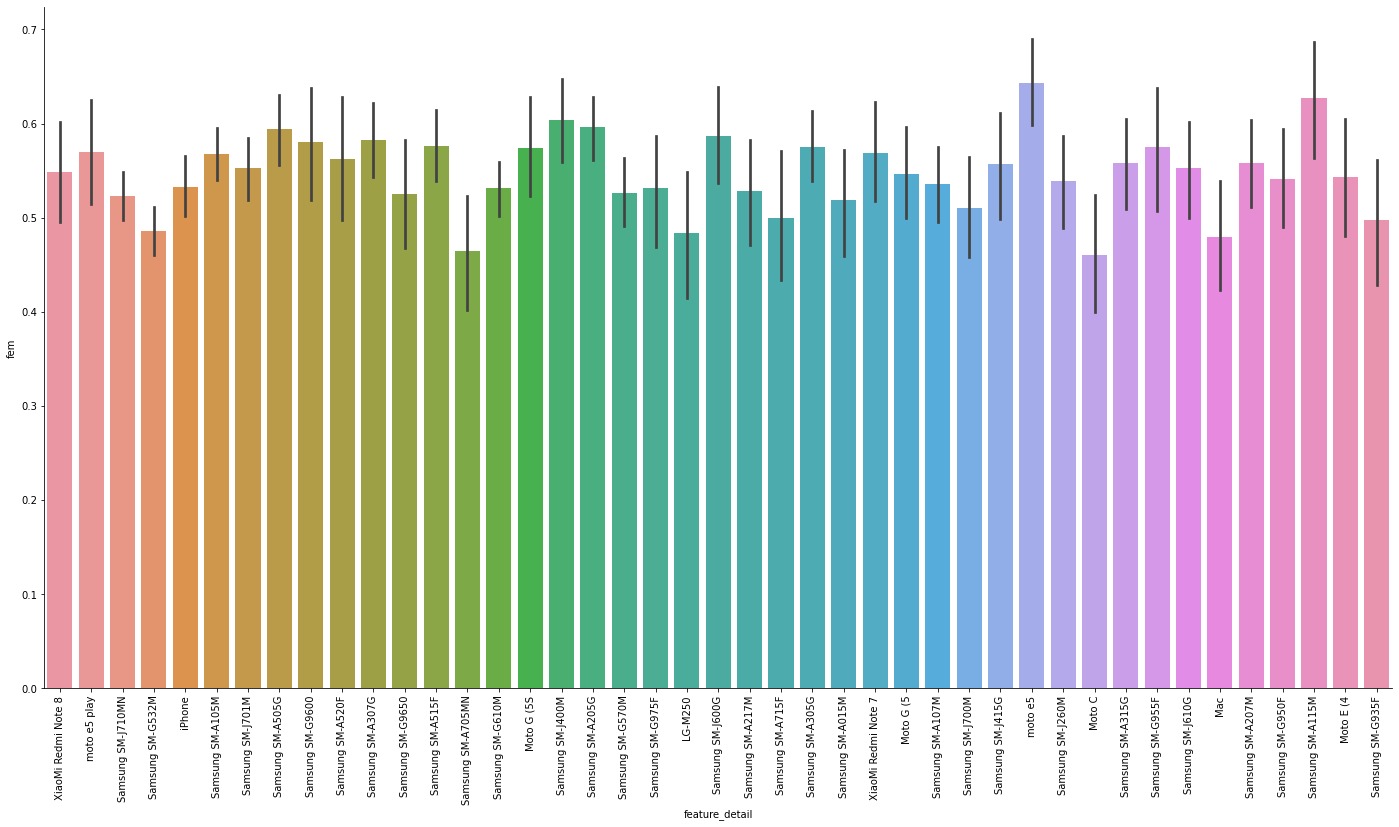

In [17]:
print('Barplot de variable feature (modelos)')
data = df_analisis_exp[df_analisis_exp['feature_type']=='df']
sns.catplot(x='feature_detail',y='fem',data=data,kind='bar',height=10, aspect=2)
plt.xticks(rotation=90)
plt.show()

Por el momento, dejaremos Modelos sin agrupar ya que presentan cierta variabilidad al momento de observar los valores contra la variable target.

In [198]:
# lista_modelos_relevantes = []
# modelo_disp = pd.DataFrame(data['feature_detail'].value_counts()).reset_index().rename(columns={'index':'model'})
# for feature_detail, row in modelo_disp.iterrows():
#     if int(row.feature_detail) > 425:
#         lista_modelos_relevantes.append(str(row.model))
# lista_modelos_relevantes 

['Samsung SM-G532M',
 'Samsung SM-J710MN',
 'Samsung SM-G610M',
 'Samsung SM-A105M',
 'iPhone',
 'Samsung SM-J701M',
 'Samsung SM-A205G',
 'Samsung SM-A505G',
 'Samsung SM-G570M',
 'Samsung SM-A515F',
 'Samsung SM-A305G',
 'Samsung SM-A107M',
 'Samsung SM-A307G',
 'Samsung SM-A315G',
 'Samsung SM-J400M']

In [19]:
# modelo_disp_final = df_analisis_exp[df_analisis_exp['feature_type']=='df']
# modelo_disp_final['feature_detail'] = np.where(modelo_disp_final['feature_detail'].isin(lista_modelos_relevantes), \
#                                                modelo_disp_final['feature_detail'], 'modelo_Otros')
# modelo_disp_final = modelo_disp_final[['device_idx','feature_detail']]
# modelo_disp_final = modelo_disp_final.rename(columns={"feature_detail": "feature_detail_2"})
# modelo_disp_final

In [ ]:
# #Otra forma
# #New variable
# df_analisis_exp['feature_detail_2']=np.where(df_analisis_exp.feature_detail.isin(['Samsung SM-G532M',
#                                                                                  'Samsung SM-J710MN',
#                                                                                  'Samsung SM-G610M',
#                                                                                  'Samsung SM-A105M',
#                                                                                  'iPhone',
#                                                                                  'Samsung SM-J701M',
#                                                                                  'Samsung SM-A205G',
#                                                                                  'Samsung SM-A505G',
#                                                                                  'Samsung SM-G570M',
#                                                                                  'Samsung SM-A515F',
#                                                                                  'Samsung SM-A305G',
#                                                                                  'Samsung SM-A107M',
#                                                                                  'Samsung SM-A307G',
#                                                                                  'Samsung SM-A315G',
#                                                                                  'Samsung SM-J400M']),\
#                                              df.feature_detail,'modelo_Other')

Incorporo al dataset original la nueva variable.

In [201]:
# df_analisis_exp = pd.merge(df_analisis_exp, modelo_disp_final, how='left', on='device_idx')
# df_analisis_exp['feature_detail3'] = np.where(df_analisis_exp['feature_type']=='df', \
#                                               df_analisis_exp['feature_detail_2'], \
#                                               df_analisis_exp['feature_detail2'])
# df_analisis_exp = df_analisis_exp.drop('feature_detail_2', axis=1)
# print(df_analisis_exp[df_analisis_exp['feature_type']=='df'].feature_detail3.unique())

# df_analisis_exp

['modelo_Otros' 'Samsung SM-J710MN' 'Samsung SM-G532M' 'iPhone'
 'Samsung SM-A105M' 'Samsung SM-J701M' 'Samsung SM-A505G'
 'Samsung SM-A307G' 'Samsung SM-A515F' 'Samsung SM-G610M'
 'Samsung SM-J400M' 'Samsung SM-A205G' 'Samsung SM-G570M'
 'Samsung SM-A305G' 'Samsung SM-A107M' 'Samsung SM-A315G']


,device_idx,label,feature_type,feature_detail,y,feature_detail2,feature_detail3
0,392.0,2.0,db,XiaoMi,0,marca_Otros,marca_Otros
1,392.0,2.0,bf,Chrome,0,Chrome,Chrome
2,392.0,2.0,ov,Android 9,0,Android 9,Android 9
3,392.0,2.0,of,Android,0,Android,Android
4,392.0,2.0,df,XiaoMi Redmi Note 8,0,XiaoMi Redmi Note 8,modelo_Otros
...,...,...,...,...,...,...,...
313146,101820.0,2.0,db,XiaoMi,0,marca_Otros,marca_Otros
313147,101862.0,2.0,db,Samsung,0,Samsung,Samsung
313148,101862.0,2.0,bf,SocialApp,0,SocialApp,SocialApp
313149,101862.0,2.0,of,Android,0,Android,Android


### SISTEMA OPERATIVO

In [20]:
print('Group by feature df (of)')
data = df_analisis_exp[df_analisis_exp['feature_type']=='of']
pd.DataFrame(data['feature_detail'].value_counts())

Group by feature df (of)


,feature_detail
Windows,46888
Android,37729
Mac OS X,2461
iOS,1012
Linux,652


In [21]:
print('Porcentaje sobre total de dispositivos únicos del dataset')
data = df_analisis_exp[df_analisis_exp['feature_type']=='of']
pd.DataFrame(round(data['feature_detail'].value_counts()/df_analisis_exp['device_idx'].nunique()*100,2)).head(15)

Porcentaje sobre total de dispositivos únicos del dataset


,feature_detail
Windows,52.80
Android,42.48
Mac OS X,2.77
iOS,1.14
Linux,0.73


In [22]:
print('Porcentaje de dispositivos en cada OS sobre total de dispositivos con OS')
data = df_analisis_exp[df_analisis_exp['feature_type']=='of']
pd.DataFrame(round(data['feature_detail'].value_counts()/data.shape[0]*100,2))

Porcentaje de dispositivos en cada OS sobre total de dispositivos con OS


,feature_detail
Windows,52.84
Android,42.52
Mac OS X,2.77
iOS,1.14
Linux,0.73


In [23]:
data2=pd.DataFrame(data['feature_detail'].value_counts())
data2=data2['feature_detail'].cumsum()/data.shape[0] #Cummulative Sum
print(data2)
print("Cummulative distribution of the top 1 of the OS with more devices (%): ",round(data2.iloc[0]*100,3))
print("Cummulative distribution of the top 2 of the OS with more devices (%): ",round(data2.iloc[1]*100,3))
print("Cummulative distribution of the top 3 of the models with more devices (%): ",round(data2.iloc[2]*100,3))
print("Cummulative distribution of the top 4 of the models with more devices (%): ",round(data2.iloc[3]*100,3))

Windows     0.528363
Android     0.953517
Mac OS X    0.981249
iOS         0.992653
Linux       1.000000
Name: feature_detail, dtype: float64
Cummulative distribution of the top 1 of the OS with more devices (%):  52.836
Cummulative distribution of the top 2 of the OS with more devices (%):  95.352
Cummulative distribution of the top 3 of the models with more devices (%):  98.125
Cummulative distribution of the top 4 of the models with more devices (%):  99.265


Barplot de variable feature (Sistema Operativo)


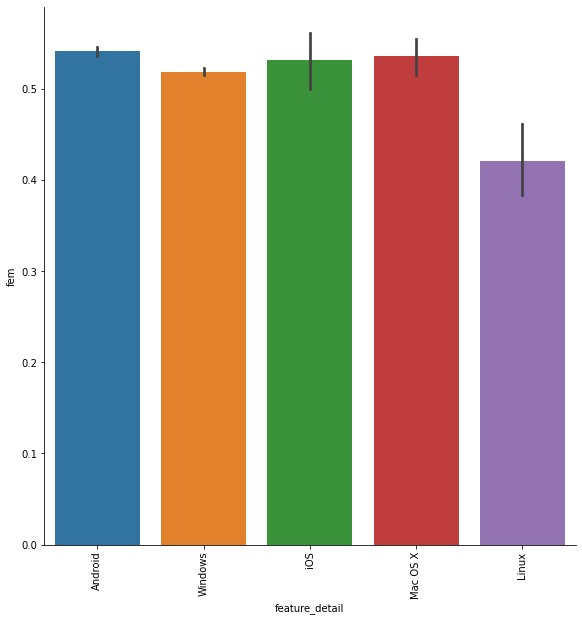

In [24]:
print('Barplot de variable feature (Sistema Operativo)')
data = df_analisis_exp[df_analisis_exp['feature_type']=='of']
sns.catplot(x='feature_detail',y='fem',data=data,kind='bar',height=8, aspect=1)
plt.xticks(rotation=90)
plt.show()

#### Posible Mejora
Posible mejora al modelo: Nueva variable 'sist_op_grouped' con valores WINDOWS, ANDROID, SO_OTROS

In [30]:
sist_op_grouped_disp_final = df_analisis_exp[df_analisis_exp['feature_type']=='of']
sist_op_grouped_disp_final['feature_detail'] = np.where(sist_op_grouped_disp_final['feature_detail'].isin(['Windows','Android']), \
                                               sist_op_grouped_disp_final['feature_detail'], 'sist_op_grouped_Otros')
sist_op_grouped_disp_final = sist_op_grouped_disp_final[['device_idx','feature_detail']]
sist_op_grouped_disp_final = sist_op_grouped_disp_final.rename(columns={"feature_detail": "feature_detail_2"})

df_analisis_exp = pd.merge(df_analisis_exp, sist_op_grouped_disp_final, how='left', on='device_idx')
df_analisis_exp['feature_detail'] = np.where(df_analisis_exp['feature_type']=='of', \
                                              df_analisis_exp['feature_detail_2'], \
                                              df_analisis_exp['feature_detail'])
df_analisis_exp = df_analisis_exp.drop('feature_detail_2', axis=1)
print(df_analisis_exp[df_analisis_exp['feature_type']=='of'].feature_detail.unique())

df_analisis_exp

['Android' 'Windows' 'sist_op_grouped_Otros']


,device_idx,label,feature_type,feature_detail,age,fem
0,392.0,2.0,db,XiaoMi,6.0,0
1,392.0,2.0,bf,Chrome,6.0,0
2,392.0,2.0,ov,Android 9,6.0,0
3,392.0,2.0,im,1,6.0,0
4,392.0,2.0,of,Android,6.0,0
...,...,...,...,...,...,...
487954,101862.0,2.0,bf,SocialApp,5.0,0
487955,101862.0,2.0,oa,old,5.0,0
487956,101862.0,2.0,im,1,5.0,0
487957,101862.0,2.0,of,Android,5.0,0


### VERSIÓN DEL SISTEMA OPERATIVO

In [270]:
print('Group by feature ov')
data = df_analisis_exp[df_analisis_exp['feature_type']=='ov']
pd.DataFrame(data['feature_detail'].value_counts())

Group by feature ov


,feature_detail
Windows 10,33714
Android 10,14697
Windows 7,10064
Android 9,7438
Android 8,7366
Android 6,3251
Android 7,3155
Windows 8,2260
Android 5,1226
Windows XP,754


In [271]:
print('Porcentaje sobre total de dispositivos únicos del dataset')
data = df_analisis_exp[df_analisis_exp['feature_type']=='ov']
pd.DataFrame(round(data['feature_detail'].value_counts()/df_analisis_exp['device_idx'].nunique()*100,2)).head(15)

Porcentaje sobre total de dispositivos únicos del dataset


,feature_detail
Windows 10,37.96
Android 10,16.55
Windows 7,11.33
Android 9,8.38
Android 8,8.29
Android 6,3.66
Android 7,3.55
Windows 8,2.54
Android 5,1.38
Windows XP,0.85


In [272]:
print('Porcentaje de dispositivos en cada versión SO sobre total de dispositivos con versión SO')
data = df_analisis_exp[df_analisis_exp['feature_type']=='ov']
pd.DataFrame(round(data['feature_detail'].value_counts()/data.shape[0]*100,2)).head(15)

Porcentaje de dispositivos en cada versión SO sobre total de dispositivos con versión SO


,feature_detail
Windows 10,39.52
Android 10,17.23
Windows 7,11.80
Android 9,8.72
Android 8,8.63
Android 6,3.81
Android 7,3.70
Windows 8,2.65
Android 5,1.44
Windows XP,0.88


In [273]:
data2=pd.DataFrame(data['feature_detail'].value_counts())
data2=data2['feature_detail'].cumsum()/data.shape[0] #Cummulative Sum
print(data2)
print("Cummulative distribution of the top 1 of the OSV with more devices (%): ",round(data2.iloc[0]*100,3))
print("Cummulative distribution of the top 3 of the OSV with more devices (%): ",round(data2.iloc[2]*100,3))
print("Cummulative distribution of the top 5 of the OSV with more devices (%): ",round(data2.iloc[4]*100,3))
print("Cummulative distribution of the top 8 of the OSV with more devices (%): ",round(data2.iloc[7]*100,3))
print("Cummulative distribution of the top 12 of the OSV with more devices (%): ",round(data2.iloc[11]*100,3))

Windows 10    0.395213
Android 10    0.567498
Windows 7     0.685473
Android 9     0.772665
Android 8     0.859013
Android 6     0.897123
Android 7     0.934108
Windows 8     0.960601
Android 5     0.974972
Windows XP    0.983811
Android 4     0.990821
iOS 14        0.996565
iOS 13        1.000000
Name: feature_detail, dtype: float64
Cummulative distribution of the top 1 of the OSV with more devices (%):  39.521
Cummulative distribution of the top 3 of the OSV with more devices (%):  68.547
Cummulative distribution of the top 5 of the OSV with more devices (%):  85.901
Cummulative distribution of the top 8 of the OSV with more devices (%):  96.06
Cummulative distribution of the top 12 of the OSV with more devices (%):  99.657


Barplot de variable feature (Operative System Version)


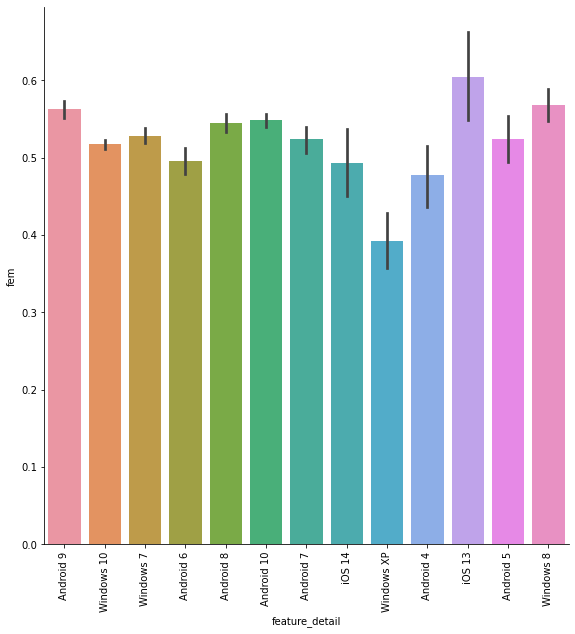

In [274]:
print('Barplot de variable feature (Operative System Version)')
data = df_analisis_exp[df_analisis_exp['feature_type']=='ov']
sns.catplot(x='feature_detail',y='fem',data=data,kind='bar',height=8, aspect=1)
plt.xticks(rotation=90)
plt.show()

No se aplicará feature nueva reduciendo cantidad de Versiones de Sistemas Operativos.

In [275]:
#El siguiente análisis finalmente no es necesario ya que existe el tipo de feature 'oa' que indica antiguedad del dispositivo

A raíz del sistema operativo se puede tener una idea de qué tan antiguo es el dispositivo.   
Busco años de cada sistema operativo y armo un dataframe con esta información.   
Genero variable *year_so* que indica el año de la versión del sistema operativo.   
*La antiguedad puede ser útil para la adaptación al modelo de Rangos de Edad de los dueños de los dispositivos.*

In [211]:
df_versiones_so = pd.DataFrame(columns=['feature_detail','year_so'], data=[('Windows XP','2001'),\
                                                                           ('Windows Vista','2007'),\
                                                                           ('Windows 7','2009'),\
                                                                           ('Windows 8','2012'),\
                                                                           ('Windows 10','2015'),\
                                                                           ('Android 5','2015'),\
                                                                           ('Android 1','2008'),\
                                                                           ('Android 1.1','2009'),\
                                                                           ('Android 1.5','2009'),\
                                                                           ('Android 1.6','2009'),\
                                                                           ('Android 2','2009'),\
                                                                           ('Android 2.2','2010'),\
                                                                           ('Android 2.3','2010'),\
                                                                           ('Android 3','2011'),\
                                                                           ('Android 4','2011'),\
                                                                           ('Android 4.1','2012'),\
                                                                           ('Android 4.4','2013'),\
                                                                           ('Android 5','2014'),\
                                                                           ('Android 6','2015'),\
                                                                           ('Android 7','2016'),\
                                                                           ('Android 8','2017'),\
                                                                           ('Android 9','2018'),\
                                                                           ('Android 10','2019'),\
                                                                           ('Android 11','2020'),\
                                                                           ('iOS 13','2019'),\
                                                                           ('iOS 14','2020'),\
                                                                           ('iOS 12 10','2018'),\
                                                                           ('iOS 11 10','2017'),\
                                                                           ('iOS 10 10','2016'),\
                                                                           ('iOS 9 10','2015'),\
                                                                           ('iOS 8 10','2014'),\
                                                                           ('iOS 7 10','2013'),\
                                                                           ('iOS 6 10','2012'),\
                                                                           ('iOS 5 10','2011'),\
                                                                           ('iOS 4 10','2010'),\
                                                                           ('iOS 3 10','2009'),\
                                                                           ('iOS 2 10','2008'),\
                                                                           ('iOS 1 10','2007')])
df_versiones_so.head()

,feature_detail,year_so
0,Windows XP,2001
1,Windows Vista,2007
2,Windows 7,2009
3,Windows 8,2012
4,Windows 10,2015


Genero una variable con la antiguedad estimada del dispositivo, en años.

In [212]:
# vso_disp_final = df_analisis_exp[df_analisis_exp['feature_type']=='ov']
# vso_disp_final = vso_disp_final[['device_idx','feature_detail']]
# vso_disp_final = pd.merge(vso_disp_final, df_versiones_so, how='left', on='feature_detail')
# today = date.today()
# vso_disp_final['ant_estimated'] = today.year - vso_disp_final['year_so'].astype(int)

# vso_disp_final

,device_idx,feature_detail,year_so,ant_estimated
0,392.0,Android 9,2018,3
1,930.0,Windows 10,2015,6
2,2544.0,Windows 10,2015,6
3,3874.0,Windows 7,2009,12
4,3910.0,Windows 10,2015,6
...,...,...,...,...
86570,101016.0,Android 9,2018,3
86571,101104.0,Android 10,2019,2
86572,101523.0,Android 8,2017,4
86573,101820.0,Android 9,2018,3


In [213]:
# print(vso_disp_final.isnull().sum())

device_idx        0
feature_detail    0
year_so           0
ant_estimated     0
dtype: int64


In [214]:
# vso_disp_final = vso_disp_final[['device_idx','ant_estimated']]
# df_analisis_exp = pd.merge(df_analisis_exp, vso_disp_final, how='left', on='device_idx')

# print('Promedio antiguedad de dispositivos: ', df_analisis_exp['ant_estimated'].mean())
# df_analisis_exp

Promedio antiguedad de dispositivos:  5.380734436318665


,device_idx,label,feature_type,feature_detail,y,feature_detail2,feature_detail3,ant_estimated
0,392.0,2.0,db,XiaoMi,0,marca_Otros,marca_Otros,3.0
1,392.0,2.0,bf,Chrome,0,Chrome,Chrome,3.0
2,392.0,2.0,ov,Android 9,0,Android 9,Android 9,3.0
3,392.0,2.0,of,Android,0,Android,Android,3.0
4,392.0,2.0,df,XiaoMi Redmi Note 8,0,XiaoMi Redmi Note 8,modelo_Otros,3.0
...,...,...,...,...,...,...,...,...
318226,101820.0,2.0,db,XiaoMi,0,marca_Otros,marca_Otros,3.0
318227,101862.0,2.0,db,Samsung,0,Samsung,Samsung,3.0
318228,101862.0,2.0,bf,SocialApp,0,SocialApp,SocialApp,3.0
318229,101862.0,2.0,of,Android,0,Android,Android,3.0


In [215]:
print(df_analisis_exp.isnull().sum())

device_idx             0
label                  0
feature_type           0
feature_detail         0
y                      0
feature_detail2        0
feature_detail3        0
ant_estimated      10158
dtype: int64


In [230]:
# df_analisis_exp[df_analisis_exp['ant_estimated'].isnull()].feature_type.unique()
#Los devices que no tienen info de version de sistema operativo, contienen antiguedad NaN, les colocaré la antiguedad promedio

array(['db', 'bf', 'df', 'of'], dtype=object)

**ANTIGüEDAD**

In [276]:
print('Group by feature OA')
data = df_analisis_exp[df_analisis_exp['feature_type']=='oa']
pd.DataFrame(data['feature_detail'].value_counts())

Group by feature OA


,feature_detail
new,51506
old,25061
ancient,9117


In [277]:
print('Porcentaje sobre total de dispositivos únicos del dataset')
data = df_analisis_exp[df_analisis_exp['feature_type']=='oa']
pd.DataFrame(round(data['feature_detail'].value_counts()/df_analisis_exp['device_idx'].nunique()*100,2)).head(15)

Porcentaje sobre total de dispositivos únicos del dataset


,feature_detail
new,58.00
old,28.22
ancient,10.27


In [278]:
print('Porcentaje de dispositivos en cada valor de antigüedad sobre total de dispositivos con antigüedad')
data = df_analisis_exp[df_analisis_exp['feature_type']=='oa']
pd.DataFrame(round(data['feature_detail'].value_counts()/data.shape[0]*100,2)).head(15)

Porcentaje de dispositivos en cada valor de antigüedad sobre total de dispositivos con antigüedad


,feature_detail
new,60.11
old,29.25
ancient,10.64


Barplot de variable feature (Antigüedad)


<Figure size 432x576 with 0 Axes>

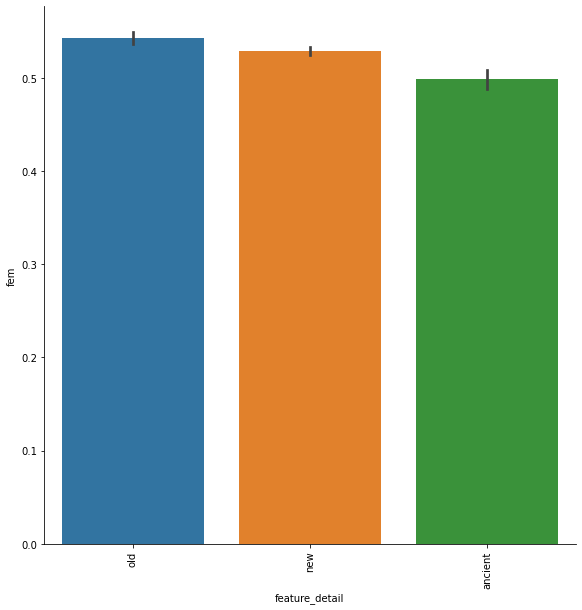

In [280]:
print('Barplot de variable feature (Antigüedad)')
data = df_analisis_exp[df_analisis_exp['feature_type']=='oa']
sns.catplot(x='feature_detail',y='fem',data=data,kind='bar',height=8, aspect=1)
plt.xticks(rotation=90)
plt.show()

En principio no se harán modificaciones en la variable de antigüedad.

**IS MOBILE**

In [291]:
print('Group by feature im')
data = df_analisis_exp[df_analisis_exp['feature_type']=='im']
print(pd.DataFrame(data['feature_detail'].value_counts()))
print('Es una variable directriz')

Group by feature im
   feature_detail
1           38216
Es una variable directriz


In [292]:
print('Porcentaje sobre total de dispositivos únicos del dataset')
data = df_analisis_exp[df_analisis_exp['feature_type']=='im']
pd.DataFrame(round(data['feature_detail'].value_counts()/df_analisis_exp['device_idx'].nunique()*100,2)).head(15)

Porcentaje sobre total de dispositivos únicos del dataset


,feature_detail
1,43.03


**Warning**
Genero nueva variable: Cuando exita 1 como valor, lo dejo en 1, sino 0. Esto hay que hacerlo cuando se genere el One Hot Encoding para el modelo.

**IS TABLET**

In [296]:
print('Group by feature it')
data = df_analisis_exp[df_analisis_exp['feature_type']=='it']
print(pd.DataFrame(data['feature_detail'].value_counts()))
print('Es una variable directriz')

Group by feature it
   feature_detail
1             653
Es una variable directriz


In [295]:
print('Porcentaje sobre total de dispositivos únicos del dataset')
data = df_analisis_exp[df_analisis_exp['feature_type']=='it']
pd.DataFrame(round(data['feature_detail'].value_counts()/df_analisis_exp['device_idx'].nunique()*100,2)).head(15)

Porcentaje sobre total de dispositivos únicos del dataset


,feature_detail
1,0.74


**IS PC**

In [297]:
print('Group by feature ip')
data = df_analisis_exp[df_analisis_exp['feature_type']=='ip']
print(pd.DataFrame(data['feature_detail'].value_counts()))
print('Es una variable directriz')

Group by feature ip
   feature_detail
1           50091
Es una variable directriz


In [298]:
print('Porcentaje sobre total de dispositivos únicos del dataset')
data = df_analisis_exp[df_analisis_exp['feature_type']=='ip']
pd.DataFrame(round(data['feature_detail'].value_counts()/df_analisis_exp['device_idx'].nunique()*100,2)).head(15)

Porcentaje sobre total de dispositivos únicos del dataset


,feature_detail
1,56.4


### NAVEGADOR

In [216]:
print('Group by feature BF')
data = df_analisis_exp[df_analisis_exp['feature_type']=='bf']
pd.DataFrame(data['feature_detail'].value_counts())

Group by feature BF


,feature_detail
Chrome,70931
SocialApp,6610
Brand_browser,5776
Firefox,4650
Safari,775
Edge,648
IE,284
Google,245


In [281]:
print('Porcentaje sobre total de dispositivos únicos del dataset')
data = df_analisis_exp[df_analisis_exp['feature_type']=='bf']
pd.DataFrame(round(data['feature_detail'].value_counts()/df_analisis_exp['device_idx'].nunique()*100,2)).head(15)

Porcentaje sobre total de dispositivos únicos del dataset


,feature_detail
Chrome,78.77
SocialApp,7.16
Brand_browser,6.41
Firefox,5.23
Safari,0.87
Edge,0.73
IE,0.32
Google,0.28


In [282]:
print('Porcentaje de dispositivos en cada navegador sobre total de dispositivos con navegador')
data = df_analisis_exp[df_analisis_exp['feature_type']=='bf']
pd.DataFrame(round(data['feature_detail'].value_counts()/data.shape[0]*100,2)).head(15)

Porcentaje de dispositivos en cada navegador sobre total de dispositivos con navegador


,feature_detail
Chrome,78.96
SocialApp,7.17
Brand_browser,6.42
Firefox,5.24
Safari,0.87
Edge,0.73
IE,0.32
Google,0.28


In [283]:
data2=pd.DataFrame(data['feature_detail'].value_counts())
data2=data2['feature_detail'].cumsum()/data.shape[0] #Cummulative Sum
print(data2)
print("Cummulative distribution of the top 1 of the Browser with more devices (%): ",round(data2.iloc[0]*100,3))
print("Cummulative distribution of the top 3 of the Browser with more devices (%): ",round(data2.iloc[2]*100,3))
print("Cummulative distribution of the top 6 of the Browser with more devices (%): ",round(data2.iloc[5]*100,3))

Chrome           0.789620
SocialApp        0.861353
Brand_browser    0.925591
Firefox          0.978012
Safari           0.986714
Edge             0.994029
IE               0.997235
Google           1.000000
Name: feature_detail, dtype: float64
Cummulative distribution of the top 1 of the Browser with more devices (%):  78.962
Cummulative distribution of the top 3 of the Browser with more devices (%):  92.559
Cummulative distribution of the top 6 of the Browser with more devices (%):  99.403


Barplot de variable feature (Navegadores)


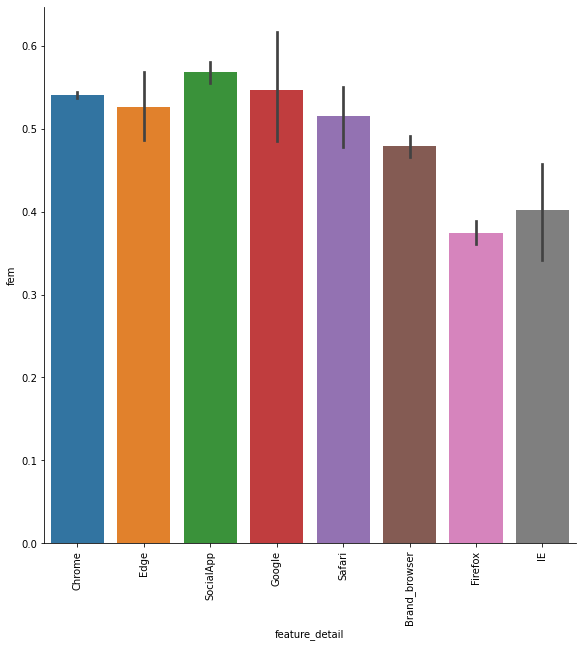

In [285]:
print('Barplot de variable feature (Navegadores)')
data = df_analisis_exp[df_analisis_exp['feature_type']=='bf']
sns.catplot(x='feature_detail',y='fem',data=data,kind='bar',height=8, aspect=1)
plt.xticks(rotation=90)
plt.show()

Obervando este gráfico, no parecería ser necesario agrupar en "Otros" a ciertos navegadores.

In [220]:
#WARNING

**Posible mejora**   
Para posible mejora: Se podría crear una variable 'navedagores_grouped' con valores "CHROME, SOCIAL APP, BRAND BROWSER, FIREFOX, OTROS", donde Otros: IE, Edge, Google, Safari.

In [31]:
# navegador_grouped_disp_final = df_analisis_exp[df_analisis_exp['feature_type']=='bf']
# navegador_grouped_disp_final['feature_detail'] = np.where(navegador_grouped_disp_final['feature_detail'].isin(['Chrome',\
#                                                                                                            'Brand_browser',\
#                                                                                                            'SocialApp',\
#                                                                                                            'Firefox']), \
#                                                navegador_grouped_disp_final['feature_detail'], 'navegador_grouped_Otros')
# navegador_grouped_disp_final = navegador_grouped_disp_final[['device_idx','feature_detail']]
# navegador_grouped_disp_final = navegador_grouped_disp_final.rename(columns={"feature_detail": "feature_detail_2"})

# df_analisis_exp = pd.merge(df_analisis_exp, navegador_grouped_disp_final, how='left', on='device_idx')
# df_analisis_exp['feature_detail'] = np.where(df_analisis_exp['feature_type']=='bf', \
#                                               df_analisis_exp['feature_detail_2'], \
#                                               df_analisis_exp['feature_detail'])
# df_analisis_exp = df_analisis_exp.drop('feature_detail_2', axis=1)
# print(df_analisis_exp[df_analisis_exp['feature_type']=='bf'].feature_detail.unique())

# df_analisis_exp

['Chrome' 'navegador_grouped_Otros' 'SocialApp' 'Brand_browser' 'Firefox']


,device_idx,label,feature_type,feature_detail,age,fem
0,392.0,2.0,db,XiaoMi,6.0,0
1,392.0,2.0,bf,Chrome,6.0,0
2,392.0,2.0,ov,Android 9,6.0,0
3,392.0,2.0,im,1,6.0,0
4,392.0,2.0,of,Android,6.0,0
...,...,...,...,...,...,...
488645,101862.0,2.0,bf,SocialApp,5.0,0
488646,101862.0,2.0,oa,old,5.0,0
488647,101862.0,2.0,im,1,5.0,0
488648,101862.0,2.0,of,Android,5.0,0


##### Observo cantidad de dispositivos por navegador. Genero una variable donde incluyo en el valor 'Otros' a aquellos navegadores con menos de 500 dispositivos.

Guardado del dataset para luego incorporarlo a modelo ML.

In [32]:
print('Estas son las variables finales que tendrá el primer modelo, considerando features de User Agent: \n','\n',df_analisis_exp.feature_detail.unique())

Estas son las variables finales que tendrá el primer modelo, considerando features de User Agent: 
 
 ['XiaoMi' 'Chrome' 'Android 9' '1' 'Android' 'XiaoMi Redmi Note 8' 'old'
 'Windows' 'navegador_grouped_Otros' 'new' 'Windows 10' 'Windows 7'
 'ancient' 'Android 6' 'SocialApp' 'Android 8' 'moto e5 play' 'Huawei'
 'Samsung SM-J710MN' 'Samsung' 'Samsung SM-G532M' 'Apple' 'iPhone'
 'sist_op_grouped_Otros' 'Android 10' 'Samsung SM-A105M' 'Android 7'
 'Samsung SM-J701M' 'iOS 14' 'Samsung SM-A505G' 'Windows XP'
 'Brand_browser' 'Samsung SM-G9600' 'Samsung SM-A520F' 'Samsung SM-A307G'
 'Firefox' 'Samsung SM-G9650' 'Samsung SM-A515F' 'Samsung SM-A705MN'
 'Android 4' 'Samsung SM-G610M' 'Moto G (5S' 'Samsung SM-J400M'
 'Samsung SM-A205G' 'Samsung SM-G570M' 'iOS 13' 'Samsung SM-G975F'
 'Android 5' 'Windows 8' 'LG' 'LG-M250' 'Samsung SM-J600G'
 'Samsung SM-A217M' 'Samsung SM-A715F' 'Samsung SM-A305G'
 'Samsung SM-A015M' 'Motorola' 'XiaoMi Redmi Note 7' 'Moto G (5'
 'Samsung SM-A107M' 'Samsung SM-J

In [33]:
df_analisis_exp.columns

Index(['device_idx', 'label', 'feature_type', 'feature_detail', 'age', 'fem'], dtype='object')

In [34]:
#Eliminar Duplicados
df_analisis_exp = df_analisis_exp.drop_duplicates()

In [35]:
df_analisis_exp = df_analisis_exp[['device_idx','feature_type','age','feature_detail','fem']]
df_analisis_exp.to_csv('df_analisis_exp_FE_UserAgent.csv')

**Modificación dataset para modelado**

In [36]:
df_gender_useragent = df_analisis_exp.copy()
print(df_gender_useragent.shape)
df_gender_useragent.head()

(487635, 5)


,device_idx,feature_type,age,feature_detail,fem
0,392.0,db,6.0,XiaoMi,0
1,392.0,bf,6.0,Chrome,0
2,392.0,ov,6.0,Android 9,0
3,392.0,im,6.0,1,0
4,392.0,of,6.0,Android,0


In [37]:
df_final_gender_ua=pd.DataFrame(np.unique(df_gender_useragent.device_idx).tolist())
df_final_gender_ua.rename(columns={0:'device_idx'},inplace=True) #Listado en df de cada device único
tmp = df_analisis_exp.copy()
tmp = tmp[['device_idx','fem']].groupby(['device_idx']).first()
df_final_gender_ua = pd.merge(df_final_gender_ua,tmp,how='left',on='device_idx')

#mergeo a lo anterior la variable ip con 1 cuando el device tenga 1, y 0 en otro caso
df_final_gender_ua=pd.merge(df_final_gender_ua, df_gender_useragent[df_gender_useragent['feature_type']=='ip'], \
                            how='left', on='device_idx')
df_final_gender_ua['ispc']=np.where(df_final_gender_ua['feature_detail']=='1',1,0)
df_final_gender_ua.drop(columns=['feature_type','age','fem_y','feature_detail'], axis=1,inplace=True)
df_final_gender_ua = df_final_gender_ua.rename(columns={'fem_x':'fem'})
df_final_gender_ua
#mergeo a lo anterior la variable it con 1 cuando el device tenga 1, y 0 en otro caso
df_final_gender_ua=pd.merge(df_final_gender_ua, df_gender_useragent[df_gender_useragent['feature_type']=='it'], \
                            how='left', on='device_idx')
df_final_gender_ua['istablet']=np.where(df_final_gender_ua['feature_detail']=='1',1,0)
df_final_gender_ua.drop(columns=['feature_type','age','fem_y','feature_detail'], axis=1,inplace=True)
df_final_gender_ua = df_final_gender_ua.rename(columns={'fem_x':'fem'})

#mergeo a lo anterior la variable im con 1 cuando el device tenga 1, y 0 en otro caso
df_final_gender_ua=pd.merge(df_final_gender_ua, df_gender_useragent[df_gender_useragent['feature_type']=='im'], \
                            how='left', on='device_idx')
df_final_gender_ua['ismobile']=np.where(df_final_gender_ua['feature_detail']=='1',1,0)
df_final_gender_ua.drop(columns=['feature_type','age','fem_y','feature_detail'], axis=1,inplace=True)
df_final_gender_ua = df_final_gender_ua.rename(columns={'fem_x':'fem'})

#mergeo a lo anterior la variable of (sistema operativo). 
df_final_gender_ua=pd.merge(df_final_gender_ua, df_gender_useragent[df_gender_useragent['feature_type']=='of'], \
                            how='left', on='device_idx')
df_final_gender_ua['sistema_op']=df_final_gender_ua['feature_detail'].fillna('SinDato') #relleno nulos: los devices sin SO informado
df_final_gender_ua.drop(columns=['feature_type','age','fem_y','feature_detail'], axis=1,inplace=True)
df_final_gender_ua = df_final_gender_ua.rename(columns={'fem_x':'fem'})

#mergeo a lo anterior la variable of (versión sistema operativo). 
df_final_gender_ua=pd.merge(df_final_gender_ua, df_gender_useragent[df_gender_useragent['feature_type']=='ov'], \
                            how='left', on='device_idx')
df_final_gender_ua['version_sistema_op']=df_final_gender_ua['feature_detail'].fillna('SinDato') #relleno nulos: los devices sin VSO informado
df_final_gender_ua.drop(columns=['feature_type','age','fem_y','feature_detail'], axis=1,inplace=True)
df_final_gender_ua = df_final_gender_ua.rename(columns={'fem_x':'fem'})

#mergeo a lo anterior la variable bf (navegador). 
df_final_gender_ua=pd.merge(df_final_gender_ua, df_gender_useragent[df_gender_useragent['feature_type']=='bf'], \
                            how='left', on='device_idx')
df_final_gender_ua['navegador']=df_final_gender_ua['feature_detail'].fillna('SinDato') #relleno nulos: los devices sin navegador informado
df_final_gender_ua.drop(columns=['feature_type','age','fem_y','feature_detail'], axis=1,inplace=True)
df_final_gender_ua = df_final_gender_ua.rename(columns={'fem_x':'fem'})

#mergeo a lo anterior la variable db (marca). 
df_final_gender_ua=pd.merge(df_final_gender_ua, df_gender_useragent[df_gender_useragent['feature_type']=='db'], \
                            how='left', on='device_idx')
df_final_gender_ua['marca']=df_final_gender_ua['feature_detail'].fillna('SinDato') #relleno nulos: los devices sin marca informado
df_final_gender_ua.drop(columns=['feature_type','age','fem_y','feature_detail'], axis=1,inplace=True)
df_final_gender_ua = df_final_gender_ua.rename(columns={'fem_x':'fem'})

#mergeo a lo anterior la variable df (modelo). 
df_final_gender_ua=pd.merge(df_final_gender_ua, df_gender_useragent[df_gender_useragent['feature_type']=='df'], \
                            how='left', on='device_idx')
df_final_gender_ua['modelo']=df_final_gender_ua['feature_detail'].fillna('SinDato') #relleno nulos: los devices sin modelo informado
df_final_gender_ua.drop(columns=['feature_type','age','fem_y','feature_detail'], axis=1,inplace=True)
df_final_gender_ua = df_final_gender_ua.rename(columns={'fem_x':'fem'})

#mergeo a lo anterior la variable oa (antigüedad). 
df_final_gender_ua=pd.merge(df_final_gender_ua, df_gender_useragent[df_gender_useragent['feature_type']=='oa'], \
                            how='left', on='device_idx')
df_final_gender_ua['antig']=df_final_gender_ua['feature_detail'].fillna('SinDato') #relleno nulos: los devices sin ant informado
df_final_gender_ua.drop(columns=['feature_type','age','fem_y','feature_detail'], axis=1,inplace=True)
df_final_gender_ua = df_final_gender_ua.rename(columns={'fem_x':'fem'})

#mergeo a lo anterior la variable oa (antigüedad). 
df_final_gender_ua=pd.merge(df_final_gender_ua, df_gender_useragent[df_gender_useragent['feature_type']=='oa'], \
                            how='left', on='device_idx')
df_final_gender_ua['marca']=df_final_gender_ua['feature_detail'].fillna('SinDato') #relleno nulos: los devices sin ant informado
df_final_gender_ua.drop(columns=['feature_type','fem_y','feature_detail'], axis=1,inplace=True) #dejo edad y variable target fem
df_final_gender_ua = df_final_gender_ua.rename(columns={'fem_x':'fem'})
df_final_gender_ua

,device_idx,fem,ispc,istablet,ismobile,sistema_op,version_sistema_op,navegador,marca,modelo,antig,age
0,1.0,1,0,0,1,Android,Android 10,SocialApp,new,SinDato,new,5.0
1,2.0,0,0,0,1,Android,Android 4,Chrome,ancient,SinDato,ancient,6.0
2,3.0,0,0,0,1,Android,Android 7,Chrome,ancient,Samsung SM-G610M,ancient,4.0
3,4.0,0,0,0,1,Android,Android 10,Chrome,new,SinDato,new,5.0
4,5.0,0,1,0,0,Windows,Windows 7,Chrome,old,SinDato,old,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
89245,101985.0,0,0,0,1,Android,Android 7,Chrome,ancient,SinDato,ancient,6.0
89246,101986.0,1,1,0,0,Windows,Windows 10,Chrome,new,SinDato,new,5.0
89247,101987.0,0,1,0,0,Windows,Windows 7,Chrome,old,SinDato,old,6.0
89248,101988.0,0,1,0,0,Windows,Windows 7,Chrome,old,SinDato,old,8.0


A partir de las variables categóricas genero dummies, para luego poder modelar en random forest y xg boost (los cuales no procesan variables categóricas).

In [38]:
X = df_final_gender_ua.drop(['device_idx','fem','age'],axis=1) #saco la edad porque no todos tienen age, para que no queden nans
X = pd.get_dummies(X, drop_first=True)
X 

,ispc,istablet,ismobile,sistema_op_SinDato,sistema_op_Windows,sistema_op_sist_op_grouped_Otros,version_sistema_op_Android 4,version_sistema_op_Android 5,version_sistema_op_Android 6,version_sistema_op_Android 7,...,modelo_Samsung SM-J710MN,modelo_SinDato,modelo_XiaoMi Redmi Note 7,modelo_XiaoMi Redmi Note 8,modelo_iPhone,modelo_moto e5,modelo_moto e5 play,antig_ancient,antig_new,antig_old
0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89245,0,0,1,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
89246,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
89247,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
89248,1,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


Se guarda dataaset final para modelado.

In [39]:
y = df_final_gender_ua[['device_idx','fem']]
df_final = pd.concat([X,y], axis=1)
df_final

,ispc,istablet,ismobile,sistema_op_SinDato,sistema_op_Windows,sistema_op_sist_op_grouped_Otros,version_sistema_op_Android 4,version_sistema_op_Android 5,version_sistema_op_Android 6,version_sistema_op_Android 7,...,modelo_XiaoMi Redmi Note 7,modelo_XiaoMi Redmi Note 8,modelo_iPhone,modelo_moto e5,modelo_moto e5 play,antig_ancient,antig_new,antig_old,device_idx,fem
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1.0,1
1,0,0,1,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,2.0,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,3.0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,4.0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,5.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89245,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,101985.0,0
89246,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,101986.0,1
89247,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,101987.0,0
89248,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,101988.0,0


In [40]:
df_final.to_csv('df_final_useragent_v2.csv')